# **Modelling and Pipeline**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues'

In [19]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 819.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Load the data

Section 1 content

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('outputs/datasets/collection/house_prices_records.csv').drop(labels=['EnclosedPorch', 'WoodDeckSF'], axis=1)
         

print(df.shape)
df.head(10)

(1460, 22)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,1,706,7.0,150,548,2.0,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,4,978,6.0,284,460,2.0,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,2,486,7.0,434,608,2.0,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,NaN,NaN,1,216,6.0,540,642,1.0,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,NaN,4.0,3,655,7.0,490,836,2.0,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000
5,796,566.0,1.0,1,732,7.0,64,480,1.0,1993.0,...,14115,85.0,0.0,30,5,5,796,1993,1995,143000
6,1694,0.0,3.0,3,1369,7.0,317,636,2.0,2004.0,...,10084,75.0,186.0,57,5,8,1686,2004,2005,307000
7,1107,983.0,3.0,2,859,6.0,216,484,NaN,1973.0,...,10382,NaN,240.0,204,6,7,1107,1973,1973,200000
8,1022,752.0,2.0,1,0,1.0,952,468,1.0,1931.0,...,6120,51.0,0.0,0,5,7,952,1931,1950,129900
9,1077,0.0,2.0,1,851,7.0,140,205,2.0,1939.0,...,7420,50.0,0.0,4,6,5,991,1939,1950,118000


---

# ML Pipeline for All data

## Pipeline for Data Cleaning and Feature Engineering

In [5]:
df.isnull().sum()

1stFlrSF          0
2ndFlrSF         86
BedroomAbvGr     99
BsmtExposure      0
BsmtFinSF1        0
BsmtFinType1    114
BsmtUnfSF         0
GarageArea        0
GarageFinish    162
GarageYrBlt      81
GrLivArea         0
KitchenQual       0
LotArea           0
LotFrontage     259
MasVnrArea        8
OpenPorchSF       0
OverallCond       0
OverallQual       0
TotalBsmtSF       0
YearBuilt         0
YearRemodAdd      0
SalePrice         0
dtype: int64

### Before we apply the feature engineering pipeline let's just remove any missing values using imputations

In [8]:
from feature_engine.imputation import MeanMedianImputer

imputer = MeanMedianImputer(imputation_method='median',
                            variables=['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea'])
                            
mean_imputer = MeanMedianImputer(imputation_method='mean',
                            variables=['BsmtFinType1', 'GarageFinish'])  

mean_imputer.fit(df)

imputer.fit(df)

df = mean_imputer.transform(df)
df = imputer.transform(df)

In [10]:
from sklearn.pipeline import Pipeline

from feature_engine.selection import SmartCorrelatedSelection
from feature_engine import transformation as vt

def HousePriceDataCleaningPipeline():
    pipeline_base = Pipeline([
        ("YeoJohnsonTransformer", vt.YeoJohnsonTransformer(variables = ['1stFlrSF', 'BsmtUnfSF', 'GarageArea', 'LotArea'])),
        
        ("log_e_transformer", vt.LogTransformer(variables = ['GrLivArea', 'LotFrontage',])),

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")),
    ])

    return pipeline_base

HousePriceDataCleaningPipeline()

Pipeline(steps=[('YeoJohnsonTransformer',
                 YeoJohnsonTransformer(variables=['1stFlrSF', 'BsmtUnfSF',
                                                  'GarageArea', 'LotArea'])),
                ('log_e_transformer',
                 LogTransformer(variables=['GrLivArea', 'LotFrontage'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6))])

In [9]:
df.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

# Feat Selection
from sklearn.feature_selection import SelectFromModel

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor


def PipelineHyperparameter(model):
    pipeline_base = Pipeline([
        ("scaler", StandardScaler()),
        ("feat_selection", SelectFromModel(model)),
        ("model", model),
    ])

    return pipeline_base

In [ ]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")

            model = PipelineHyperparameter(self.models[key])
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, )
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        columns = ['estimator', 'min_score',
                   'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        return df[columns], self.grid_searches

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['SalePrice'], axis=1),
    df['SalePrice'],
    test_size=0.2,
    random_state=0,
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1168, 21) (1168,) (292, 21) (292,)


In [13]:
pipeline_data_cleaning = HousePriceDataCleaningPipeline()
X_train = pipeline_data_cleaning.fit_transform(X_train)
X_test = pipeline_data_cleaning.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1168, 15) (1168,) (292, 15) (292,)


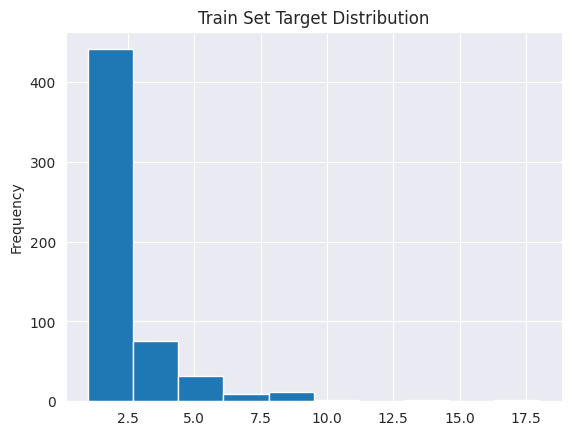

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
y_train.value_counts().plot(kind='hist', title='Train Set Target Distribution')
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='auto', random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
